In [34]:
"""
Name : Kishore Prasad N
Date : 20-01-2022
Context : Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell
            through the cone, staining it, and counting the number of rings through a microscope a time-consuming task. Other
            measurements, which are easier to obtain, are used to predict the age. This Program intends to predict the number
            of Rings in an Abalone, using the Physical Measurments in the Dataset.
            Dataset downloaded from: https://www.kaggle.com/rodolfomendes/abalone-dataset 
"""

'\nName : Kishore Prasad N\nDate : 20-01-2022\nContext : Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell\n            through the cone, staining it, and counting the number of rings through a microscope a time-consuming task. Other\n            measurements, which are easier to obtain, are used to predict the age. This Program intends to predict the number\n            of Rings in an Abalone, using the Physical Measurments in the Dataset.\n            Dataset downloaded from: https://www.kaggle.com/rodolfomendes/abalone-dataset \n'

In [10]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
ohe_data = pd.get_dummies(data, columns=['Sex'])

In [6]:
ohe_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


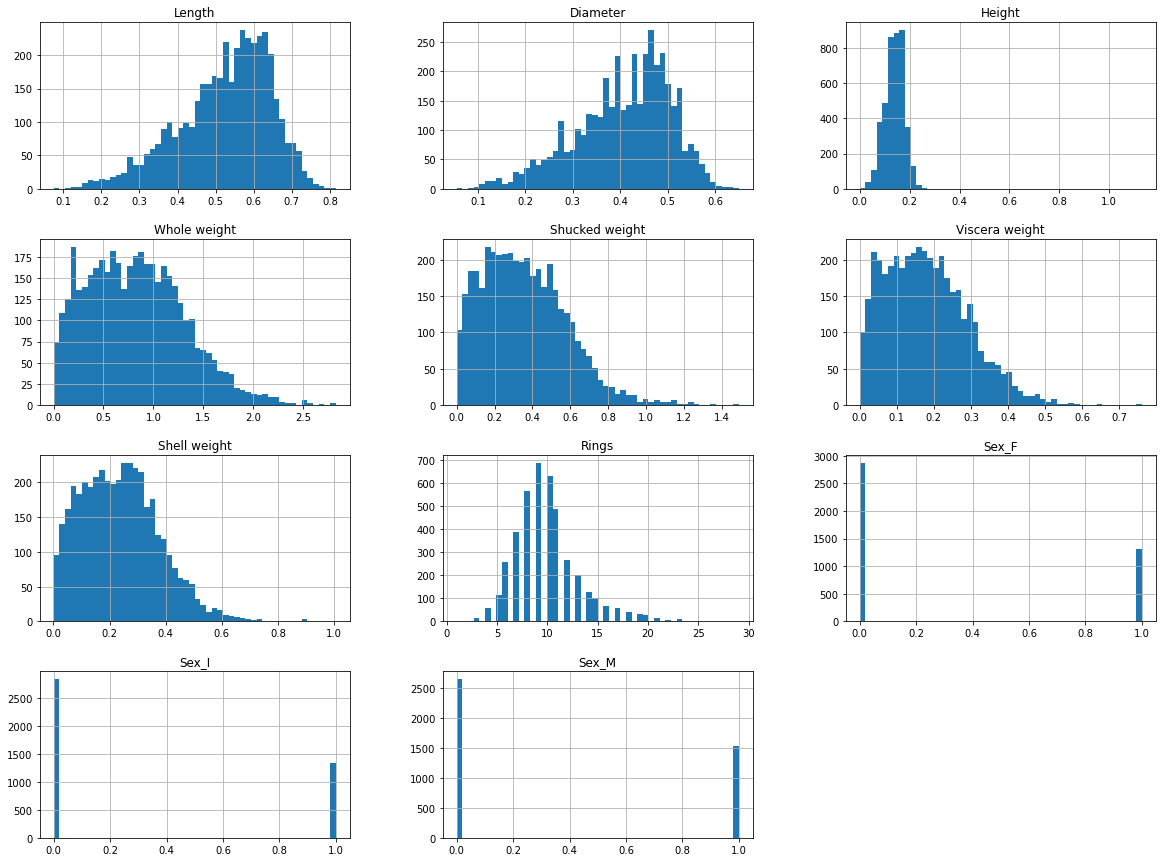

In [7]:
ohe_data.hist(bins=50, figsize=(20, 15))
plt.show()

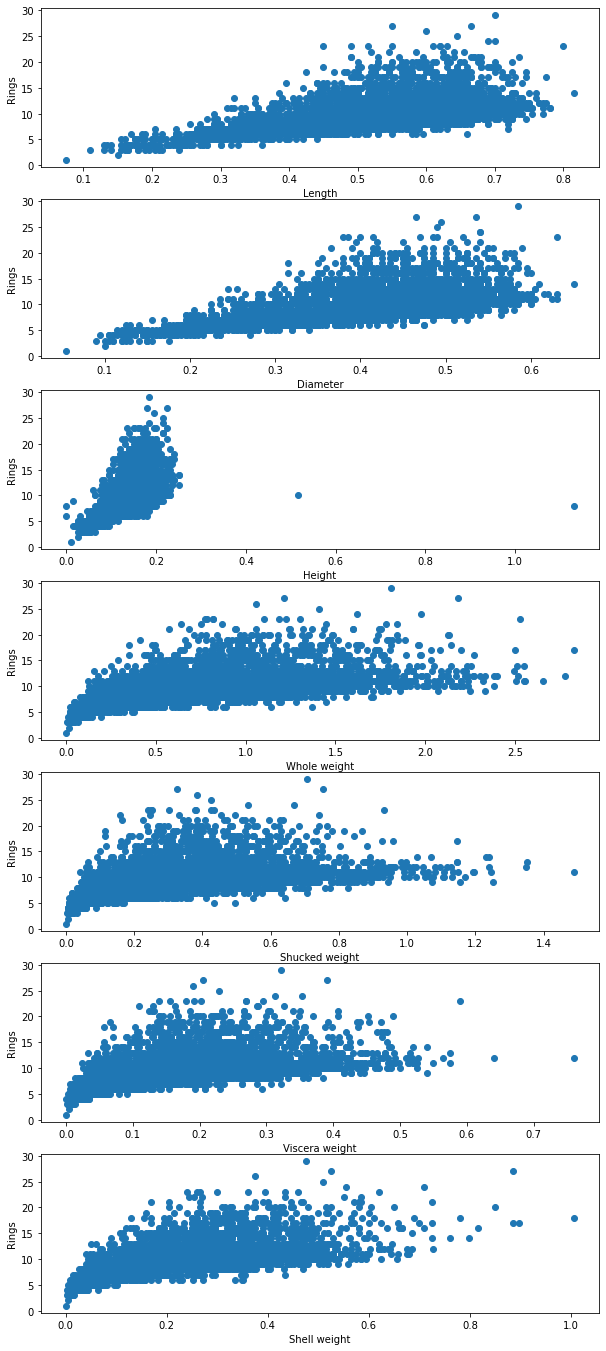

In [8]:
y = ohe_data['Rings']
X = ohe_data.drop(axis=1, columns=['Rings'])
L = list(X.columns)
figure, axis = plt.subplots(7, figsize=(10, 24))
for i in range(7):
    axis[i].scatter(x=X[L[i]], y=y)
    axis[i].set_xlabel(L[i])
    axis[i].set_ylabel('Rings')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
linreg_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(linreg_rmse)

2.1623838641367277


In [26]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X_train)
model1 = LinearRegression()
model1.fit(X_poly, y_train)
predictions1 = model1.predict(pf.fit_transform(X_test))
polyreg_deg2_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions1))
print(polyreg_deg2_rmse)

2.132872696162897


In [28]:
pf1 = PolynomialFeatures(degree=3)
X_poly1 = pf1.fit_transform(X_train)
model2 = LinearRegression()
model2.fit(X_poly1, y_train)
predictions2 = model2.predict(pf1.fit_transform(X_test))
polyreg_deg3_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions2))
print(polyreg_deg3_rmse)

2.3290513881949306


In [29]:
from sklearn.linear_model import SGDRegressor
model3 = SGDRegressor(max_iter=2000)
model3.fit(X_train, y_train.ravel())
predictions3 = model3.predict(X_test)
sgdreg_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions3))
print(sgdreg_rmse)

2.1925346101278733


In [30]:
A = ['Linear Regression', 'Degree 2 Polynomial Regression', 'Degree 3 Polynomial Regression', 'Stochstic Gradient Descent Reg']
op = {'Root Mean Squared Error':[linreg_rmse, polyreg_deg2_rmse, polyreg_deg3_rmse, sgdreg_rmse]}
Output = pd.DataFrame(op, index=A)
Output

,Root Mean Squared Error
Linear Regression,2.162384
Degree 2 Polynomial Regression,2.132873
Degree 3 Polynomial Regression,2.329051
Stochstic Gradient Descent Reg,2.192535


In [33]:
"Best Model is the Degree 2 Polynomial Model for Further predictions proceed with model1"

'Best Model is the Degree 2 Polynomial Model for Further predictions proceed with model1'